In [2]:
%matplotlib inline
import random as r
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy
import scipy.stats as st
import sklearn

In [16]:
params = np.linspace(0,0.95,20)
wealth_distributions = []
for param in params:
    filename = 'wealth_distribution_lambda_' + str(param) + '.txt'
    wealth_distributions.append(np.loadtxt(filename))

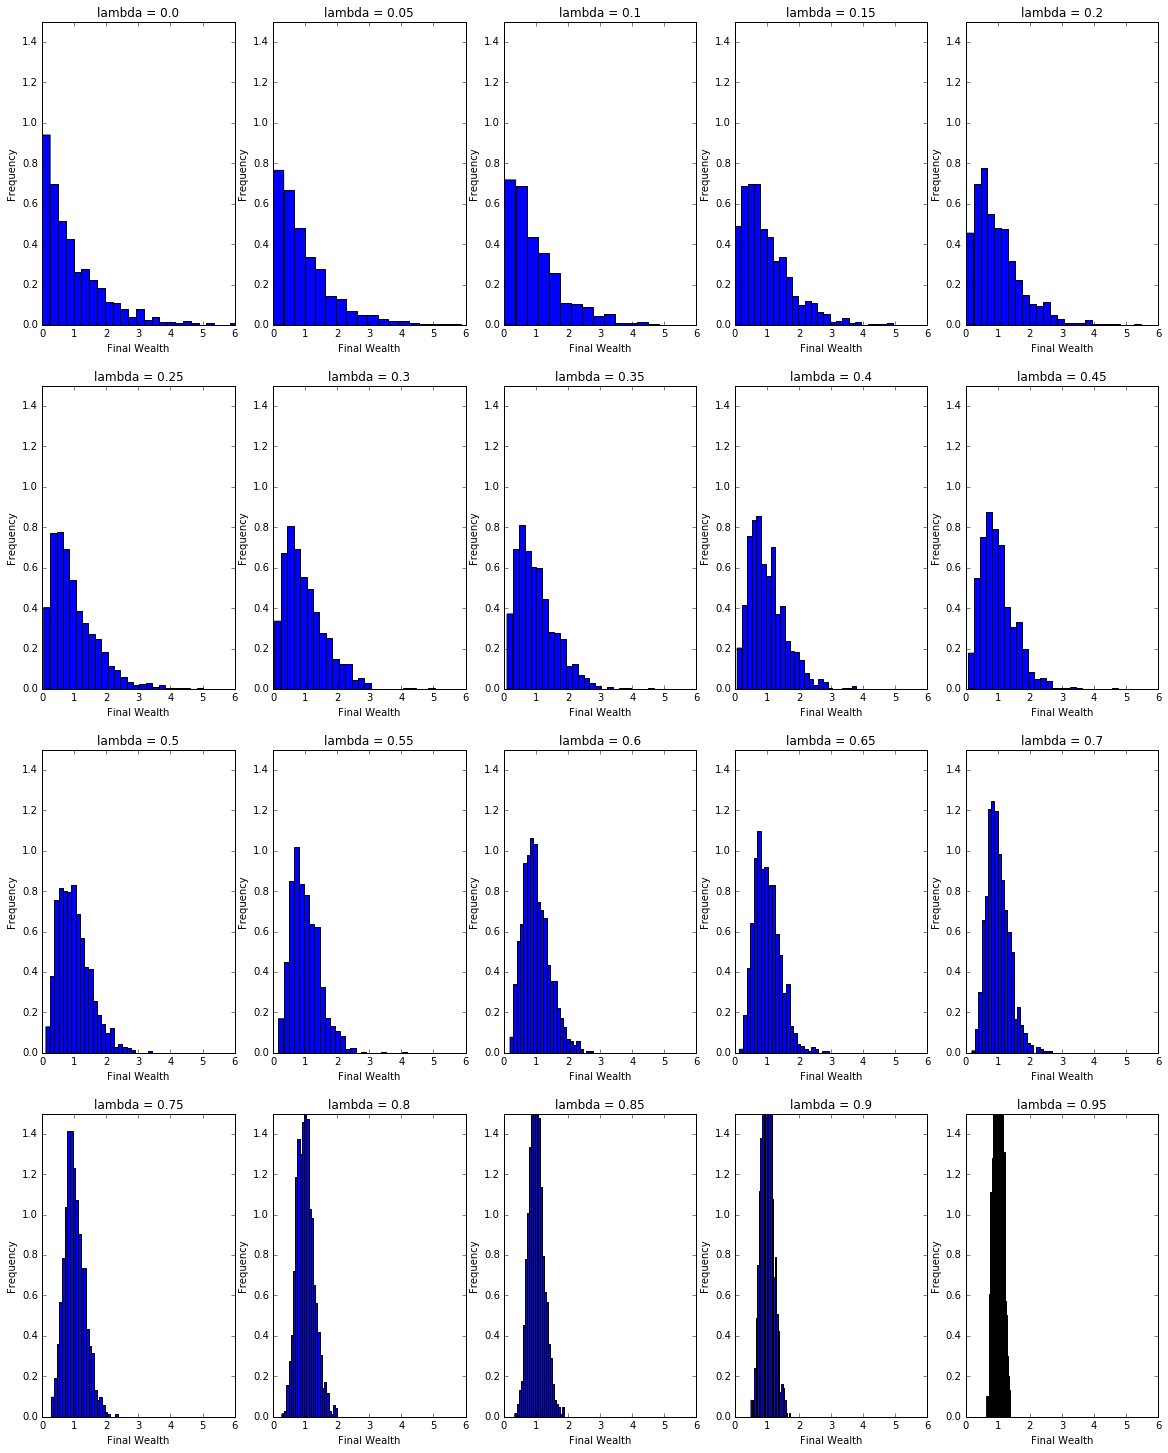

In [43]:
def plot_hists(hists, titles, h=1, w=1, n_row=2, n_col=5):
    """Helper function to plot a gallery of histograms"""
    #plt.figure(figsize=(8 * n_col, 8* n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    f, axs = plt.subplots(n_row,n_col,figsize=(5*n_row, 5*n_col))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        hist_data = hists[i]
        plt.hist(hist_data, bins=25, normed=True)
        #plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title('lambda = '+titles[i], size=12)
        #plt.xticks(np.arange(min(hist), max(hist)))
        #plt.xticks(np.arange(6))
        plt.xlim(0,6)
        plt.ylim(0,1.5)
        plt.xlabel('Final Wealth')
        plt.ylabel('Frequency')
    #plt.savefig("sample_digits.png")

params = np.round(params, 2)
titles = params.astype(str)
plot_hists(hists=wealth_distributions, titles=titles, n_row=4, n_col = 5)

    

In [44]:

#titles = 'lambda = ' + titles
#plot_gallery(sk_data.images, sk_data.target, h,w)

#for wealth_distribution in wealth_distributions:

NameError: name 'wealth_distributions' is not defined